In [1]:
#importing
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder as onehot
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
#preprocessing data
train = pd.read_csv('updated_pollution_dataset.csv')
X=train.drop(columns='Air Quality')
y=train['Air Quality']

X_scaled=StandardScaler().fit_transform(X)
y_encoded= onehot(sparse_output=False).fit_transform(y.values.reshape(-1,1))
# Original data split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# split the temporary dataset into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [3]:
#model prep
model = keras.models.Sequential()

model.add(layers.Dense(64, activation="relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation="relu", name="layr_2"))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8, activation="relu", name="layr_4"))
model.add(layers.Dense(4, activation="softmax", name="layr_5"))

model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_2 (Dense)                       │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_4 (Dense)                       │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_5 (Dense)                       │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,012 (23.48 KB)

 Trainable params: 6,012 (23.48 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
n_epochs = 50
batch_size = 80

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history= model.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.4809 - loss: 1.2980 - val_accuracy: 0.7587 - val_loss: 0.8494
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8024 - loss: 0.6737 - val_accuracy: 0.8640 - val_loss: 0.3566
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8736 - loss: 0.3250 - val_accuracy: 0.8907 - val_loss: 0.2665
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9075 - loss: 0.2299 - val_accuracy: 0.9053 - val_loss: 0.2420
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2049 - val_accuracy: 0.9120 - val_loss: 0.2299
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9303 - loss: 0.1871 - val_accuracy: 0.9093 - val_loss: 0.2182
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.1737 - val_accuracy: 0.9213 - val_loss: 0.1983
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9413 - loss: 0.1605 - val_accuracy: 0.9107 - val_los

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9348 - loss: 0.1699
Loss:  0.1566472202539444
Accuracy:  94.13333535194397 %


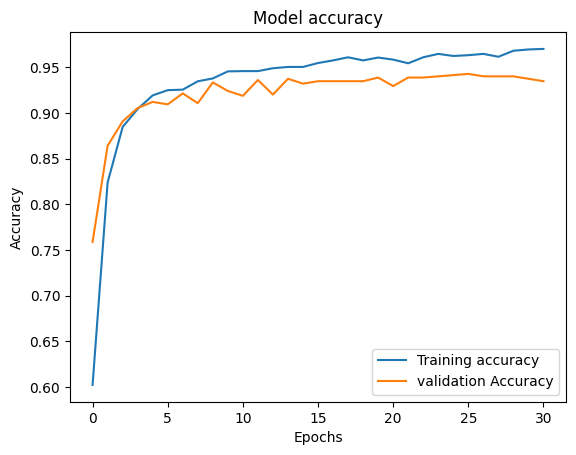

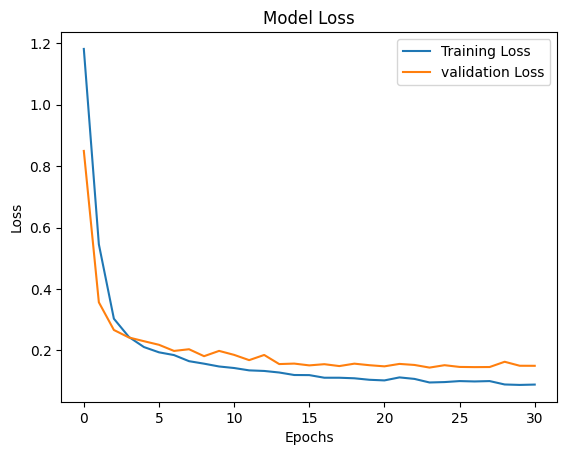

In [5]:
results = model.evaluate(X_test, y_test)

print("Loss: ",results[0])
print("Accuracy: ",results[1]*100,"%")


# Traning Accuracy
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Traning Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
